# KNN

## Load the Data 

In [1]:
# Load the data into 5 ndarrays
# The shape of the ndarrays are printed below
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

%load_ext autoreload
%autoreload 2

from load_data import load_data

X_train, y_train, X_val, y_val, X_test = load_data()
num_train = X_train.shape[0]
num_val = X_val.shape[0]

print("Data loaded:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape: ", X_test.shape)

Data loaded:
X_train shape: (37800, 28, 28)
y_train shape: (37800,)
X_val shape: (4200, 28, 28)
y_val shape: (4200,)
X_test shape:  (28000, 28, 28)


## Visualize some of the images

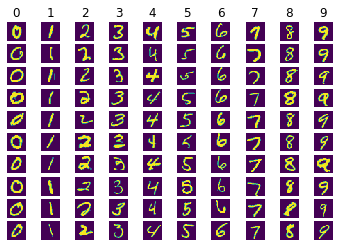

In [2]:
digits = np.arange(10)
num_digits = len(digits)
sample_per_class = 10
for digit in digits:
    idxs = np.flatnonzero(y_train == digit)
    idxs = np.random.choice(idxs, sample_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_digits + digit + 1
        plt.subplot(sample_per_class, num_digits, plt_idx)
        plt.imshow(X_train[idx])
        plt.axis('off')
        if i == 0:
            plt.title(digit)
plt.show()

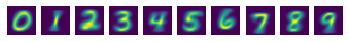

In [32]:
digits = np.arange(10)

for digit in digits:
    avr = np.mean(X_train[y_train == digit], axis=0)
    plt.subplot(1, 10, digit+1)
    plt.imshow(avr)
    plt.axis('off')
plt.show()

## Implement knn on validation set

In [5]:
from classifier.knn import knn_classifier

knn = knn_classifier()
knn.train(X_train, y_train)

k_choice = [1, 3, 5]
for k in k_choice:
    print("k = {:d}".format(k))
    print("Validation set accuracy", np.mean(knn.predict(X_val, k) == y_val))
    print()


k = 1
Validation set accuracy 0.9688095238095238

k = 3
Validation set accuracy 0.9661904761904762

k = 5
Validation set accuracy 0.9571428571428572



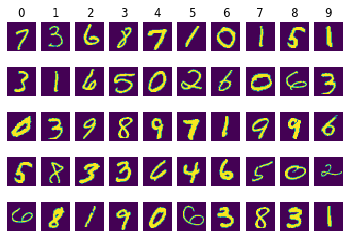

In [28]:
#visualize some wrong results
y_val_preds = knn.predict(X_val, 1)
digits = np.arange(10)
num_digits = len(digits)
sample_per_class = 5
wrong = y_val_preds != y_val
for digit in digits:
    idxs = np.flatnonzero(y_val_preds == digit * wrong)
    idxs = np.random.choice(idxs, sample_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_digits + digit + 1
        plt.subplot(sample_per_class, num_digits, plt_idx)
        plt.imshow(X_test[idx])
        plt.axis('off')
        if i == 0:
            plt.title(digit)
plt.show()

## Implement knn on test set 

In [4]:
result_path = r'dataset/submission.csv'
y_preds = knn.predict(X_test, 1)

rows =[('ImageId', 'Label')]
for index, y in enumerate(y_preds):
    rows.append((index+1, y))

import csv
with open(result_path, 'w', newline='') as result:
    result = csv.writer(result)
    result.writerows(rows)

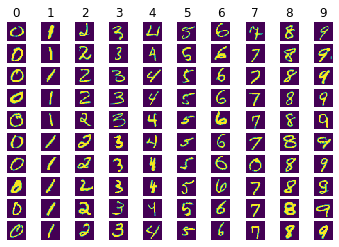

In [8]:
#Visulize some results
digits = np.arange(10)
num_digits = len(digits)
sample_per_class = 10
for digit in digits:
    idxs = np.flatnonzero(y_preds == digit)
    idxs = np.random.choice(idxs, sample_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_digits + digit + 1
        plt.subplot(sample_per_class, num_digits, plt_idx)
        plt.imshow(X_test[idx])
        plt.axis('off')
        if i == 0:
            plt.title(digit)
plt.show()